In [1]:
import pandas as pd

from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
from nltk import ngrams

In [3]:
df = pd.read_csv('preprocessed_data.csv')

In [4]:
df['transcript']

0      ['chico', 'chica', 'niño', 'niñas', 'mujer', '...
1      ['música', 'chico', 'chica', 'niño', 'niñas', ...
2      ['música', 'chico', 'chica', 'niño', 'niñas', ...
3      ['música', 'chico', 'chica', 'niño', 'niñas', ...
4      ['chico', 'chica', 'perdón', 'vo', 'niño', 'ni...
                             ...                        
430    ['pacino', 'coche', 'estar', 'bonito', 'mirar'...
431    ['guapísimo', 'vegetar', 'continuar', 'dejar',...
432    ['guapísir', 'vegetal', 'directo', 'minecraft'...
433    ['guapísimo', 'ver', 'gente', 'directo', 'plan...
434    ['música', 'botón', 'guapetón', 'hada', 'veget...
Name: transcript, Length: 435, dtype: object

In [5]:
occurrences_per_transcript = df['transcript'].str.count(r'xxxx')

# Calculate total occurrences
total_insults = occurrences_per_transcript.sum()

# Calculate average occurrence per transcript
average_occurrence = total_insults / len(df)

print(f"Average occurrences of 'xxxx' per transcript: {average_occurrence:.2f}")
print(f"Total occurrences of 'xxxx' per transcript: {total_insults:.2f}")

Average occurrences of 'xxxx' per transcript: 8.51
Total occurrences of 'xxxx' per transcript: 3701.00


In [6]:
import ast

processed_transcripts = df['transcript'].apply(ast.literal_eval)


In [7]:
type(processed_transcripts)

pandas.core.series.Series

In [8]:
# 1. Identify commonly used phrases using N-grams
all_ngrams = [ngram for transcript in processed_transcripts for ngram in ngrams(transcript, 3)]  # trigrams
common_phrases = Counter(all_ngrams).most_common(20)
print("Common Phrases:")
for phrase, freq in common_phrases:
    print(f"{' '.join(phrase)}: {freq}")

Common Phrases:
valer valer valer: 1303
mira mira mira: 738
pa pa pa: 453
ay ay ay: 444
ta ta ta: 277
ver ver ver: 241
bla bla bla: 237
chica niño niñas: 198
uy uy uy: 195
niño niñas mujer: 194
niñas mujer hombr: 194
ah valer valer: 179
chico chica niño: 178
vale valer valer: 174
toma toma toma: 162
mujer hombr viceversar: 159
correr correr correr: 143
god of war: 142
olé olé olé: 138
venir venir venir: 134


In [9]:
# 2. Identify topics using LDA
dictionary = Dictionary(processed_transcripts)
corpus = [dictionary.doc2bow(transcript) for transcript in processed_transcripts]
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, passes=15, workers=4)
print("\nTopics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}, Words: {topic}")


Topics:
Topic: 0, Words: 0.028*"valer" + 0.011*"ver" + 0.010*"cosa" + 0.010*"casa" + 0.009*"decir" + 0.007*"chico" + 0.007*"querer" + 0.007*"venir" + 0.006*"dejar" + 0.006*"música"
Topic: 1, Words: 0.020*"valer" + 0.014*"ver" + 0.013*"eh" + 0.010*"chico" + 0.010*"venir" + 0.009*"tío" + 0.007*"casa" + 0.006*"decir" + 0.006*"gente" + 0.006*"mirar"
Topic: 2, Words: 0.022*"valer" + 0.012*"ver" + 0.009*"decir" + 0.008*"cosa" + 0.007*"juego" + 0.006*"venir" + 0.006*"música" + 0.006*"gustar" + 0.006*"querer" + 0.006*"chico"
Topic: 3, Words: 0.014*"valer" + 0.009*"ver" + 0.009*"música" + 0.008*"coche" + 0.007*"gustar" + 0.007*"juego" + 0.007*"venir" + 0.007*"chico" + 0.007*"decir" + 0.007*"pasar"
Topic: 4, Words: 0.029*"valer" + 0.010*"ver" + 0.009*"dejar" + 0.009*"decir" + 0.009*"cosa" + 0.007*"tener" + 0.007*"querer" + 0.006*"quedar" + 0.006*"poder" + 0.006*"mirar"


In [10]:
# 3. Identify unique terms/values using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(transcript) for transcript in processed_transcripts])
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_items = sorted(list(enumerate(tfidf_matrix.sum(axis=0).tolist()[0])), key=lambda x: x[1], reverse=True)
print("\nUnique Terms:")
for idx, score in sorted_items[:10]:
    print(f"{feature_names[idx]}: {score}")



Unique Terms:
eh: 37.181714482229125
juego: 23.325616918923792
coche: 21.985042393242356
jugar: 17.21432736738637
willy: 16.96065076094824
xxxx: 16.266694543671512
zona: 15.725133149038491
ángel: 14.71071548740683
muerto: 14.247759822945088
directo: 14.060646691610813


In [11]:
all_tokens = [token for transcript in processed_transcripts for token in transcript]

# Count the occurrences of each token
word_freq = Counter(all_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('valer', 38384), ('ver', 19112), ('decir', 13561), ('cosa', 12458), ('chico', 11896), ('venir', 11852), ('música', 10561), ('querer', 10254), ('dejar', 9477), ('pasar', 9469), ('casa', 9139), ('gustar', 8994), ('mirar', 8822), ('eh', 8560), ('tener', 8407)]
      Word  Frequency
0    valer      38384
1      ver      19112
2    decir      13561
3     cosa      12458
4    chico      11896
5    venir      11852
6   música      10561
7   querer      10254
8    dejar       9477
9    pasar       9469
10    casa       9139
11  gustar       8994
12   mirar       8822
13      eh       8560
14   tener       8407


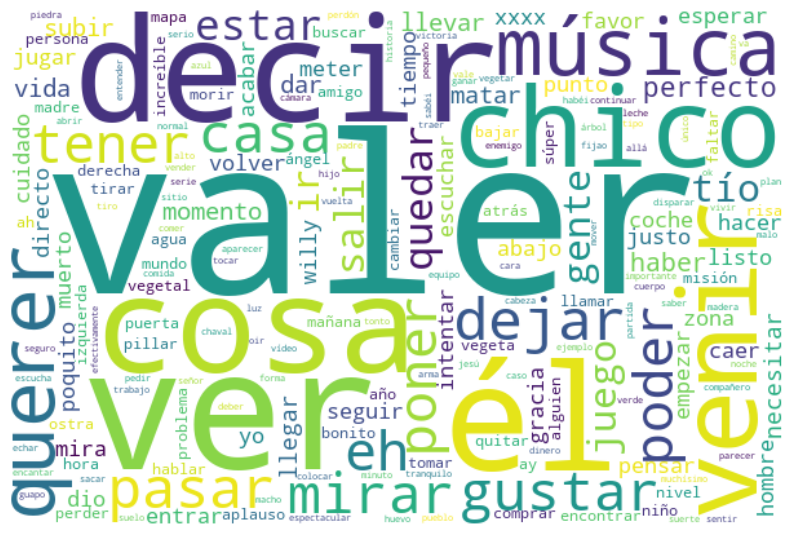

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the list of tokens back into a single string for each transcript
all_text = ' '.join([' '.join(transcript) for transcript in processed_transcripts])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(all_text)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("transcript_wordcloud.png")

plt.show()